<a href="https://colab.research.google.com/github/lucaspn017/quantitative_datas/blob/main/ShoppingBehavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **We have a dataset that contains details associated with customer purchases at a shopping mall.**

>

<div align='center'><font size="60">Basic Analisys</font></div>


# **1° Objective: Found the following relationships:**
> What is the distribution of ages related to the genders?

> Is there a correlation between the Review Rating and the Season in which it was made, as well the Item Purchased?

> Does the Shipping Type affects the Frequency of Purchases?

In [18]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download latest version
path = kagglehub.dataset_download("ahmadrazakashif/shopping-behavior-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'shopping-behavior-dataset' dataset.
Path to dataset files: /kaggle/input/shopping-behavior-dataset


In [19]:
dataSail = pd.read_csv(path + '/shopping_behavior_updated.csv')
dataSail = pd.DataFrame(dataSail)

dataGroupGender = dataSail.groupby('Gender')['Age'].value_counts()
dataGroupGender = dataGroupGender.reset_index()
dataGroupGender.columns = ['Gender', 'Age', 'Quantity']
dataSail[dataSail['Gender'] == 'Female'].describe()

dataSail

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


/tmp/ipython-input-238825533.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y ='Age', data = dataSail, palette = ['Blue', 'Pink'])


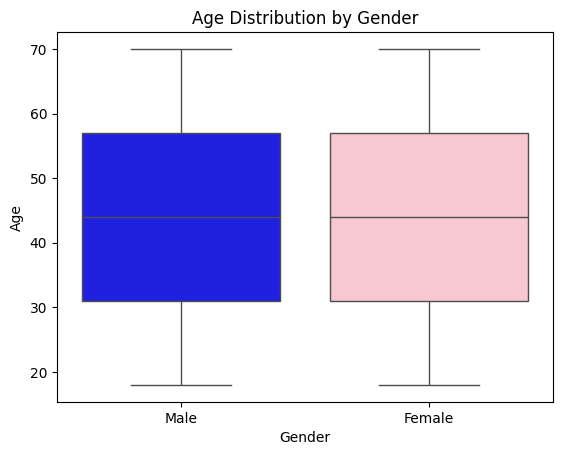

In [20]:
sns.boxplot(x='Gender', y ='Age', data = dataSail, palette = ['Blue', 'Pink'])
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

## **The distribution of ages are too similar.**

> It's is good to verify that there isn´t `bias` associated with different ages between these two genders.

> Parameters such as `Review Rating` and `Products Purchased` according to season will not be affected by these possible biases.

/tmp/ipython-input-3575697155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Season', y='Review Rating', data = dataSail, palette=['Blue', 'Green', 'Orange', 'Gold'])


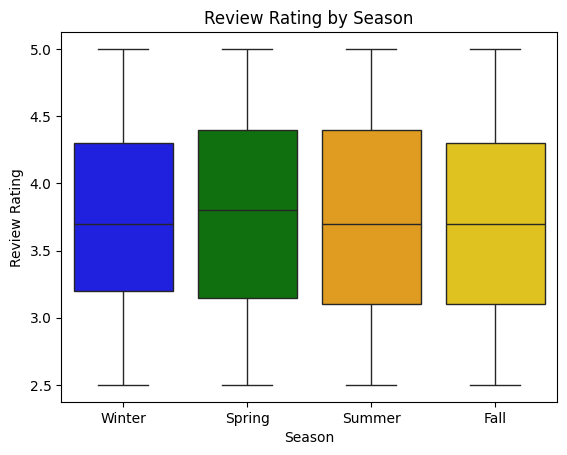

In [21]:
dataSeason = dataSail.groupby('Season')['Review Rating'].mean()
dataSeason = dataSeason.reset_index()
dataSeason.columns = ['Season', 'Review Rating Mean']

sns.boxplot(x = 'Season', y='Review Rating', data = dataSail, palette=['Blue', 'Green', 'Orange', 'Gold'])
plt.xlabel('Season')
plt.ylabel('Review Rating')
plt.title('Review Rating by Season')
plt.show()


In [22]:
purchasedRating = dataSail.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=False)
purchasedRating = purchasedRating.reset_index()
purchasedRating.columns = ['Item Purchased', 'Review Rating Mean']

purchasedRating

,Item Purchased,Review Rating Mean
0,Gloves,3.864286
1,Sandals,3.841250
2,Boots,3.812500
3,Hat,3.806494
4,T-shirt,3.782993
5,Skirt,3.782278
6,Handbag,3.775163
7,Sweater,3.767073
8,Jacket,3.763190
9,Belt,3.761491


/tmp/ipython-input-183260763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Review Rating Mean', y='Item Purchased', data=top10PI, orient='h', palette = 'rocket')


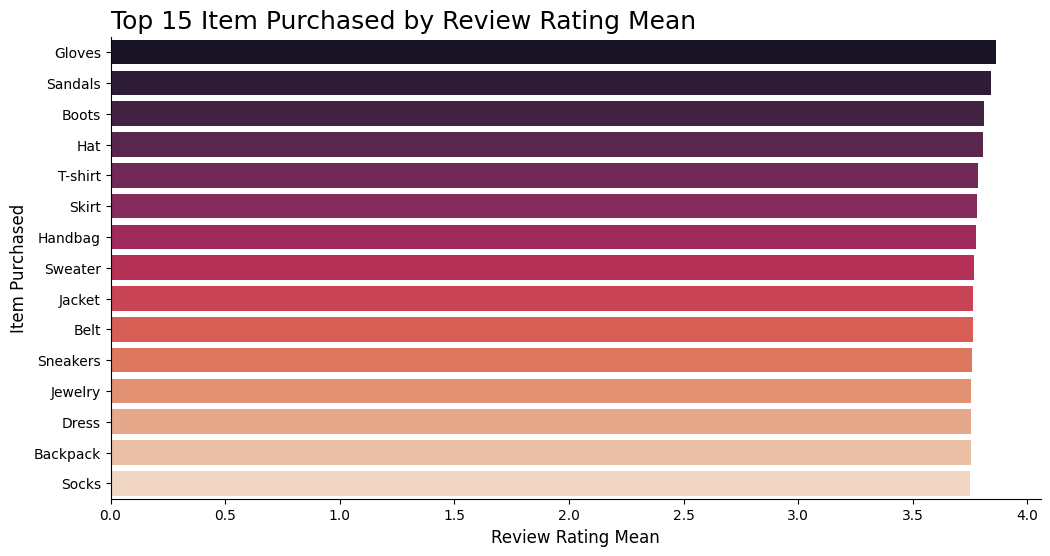

In [23]:
top10PI = purchasedRating.head(15)
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x='Review Rating Mean', y='Item Purchased', data=top10PI, orient='h', palette = 'rocket')
ax.set_title('Top 15 Item Purchased by Review Rating Mean', fontsize=18, loc='left')
ax.set_xlabel('Review Rating Mean',fontsize=12)
ax.set_ylabel('Item Purchased',fontsize=12)
sns.despine()

plt.show()

## **By the two previously graphics, we have two observations:**

> The range of ratings related to the other parameters is little bit larger in comparison with winter season.

   1. In other words, in other seasons of the year, we have a much `wider range of clothes` to buy, compared to winter.

   2. In this case, the `sense of utility` **(protect from the cold)** by these clothes is more important than the clothes towards to the other seasons, in which the **apparency is more important**.

> In the second graphic it´s possible to verify that `neutral clothes` are better evaluated than clothes commonly used in specific ocasions, as backpack, dress and jewelry.





In [24]:
ShType = dataSail['Shipping Type'].value_counts()
ShType = ShType.reset_index()
print(ShType)

    Shipping Type  count
0   Free Shipping    675
1        Standard    654
2    Store Pickup    650
3    Next Day Air    648
4         Express    646
5  2-Day Shipping    627


Text(0.5, 1.0, 'Shipping Type Word Cloud')

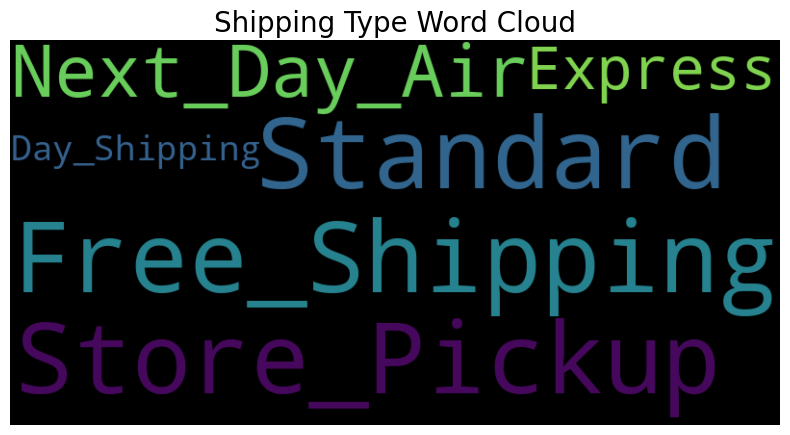

In [25]:
ShType = dataSail['Shipping Type'].value_counts()
ShType = ShType.reset_index()

ShType['Shipping Type'] = ShType['Shipping Type'].str.replace(' ', '_')

text = " ".join(ShType['Shipping Type'])

nuvem = WordCloud(width=800, height=400, collocations=False).generate(text)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(nuvem, interpolation='bilinear')
ax.axis('off')
ax.set_title('Shipping Type Word Cloud', fontsize='20')

/tmp/ipython-input-1985975174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Review Rating Mean', y='Shipping Type', data=ShTypeByReview, orient='h', palette='rocket')


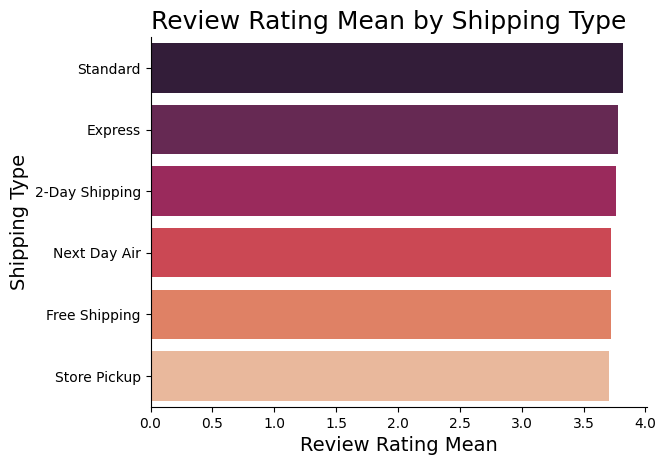

In [26]:
ShTypeByReview = dataSail.groupby('Shipping Type')['Review Rating'].mean().sort_values(ascending=False)
ShTypeByReview = ShTypeByReview.reset_index()
ShTypeByReview.columns = ['Shipping Type', 'Review Rating Mean']

sns.barplot(x='Review Rating Mean', y='Shipping Type', data=ShTypeByReview, orient='h', palette='rocket')
sns.despine()
plt.title('Review Rating Mean by Shipping Type', loc='left', fontsize=18)
plt.xlabel('Review Rating Mean',fontsize=14)
plt.ylabel('Shipping Type',fontsize=14)
plt.tick_params(axis='y',labelsize=10)
plt.show()

##**The Shipping Type most applied after `Store Pickup` was `Free Shipping`.**

> Besides that, we don´t have products with best ratings, associated with this taxes.

1. Free Shipping products could have a `slow delivery` or other logistic problem associated with it.

2. Store pickup is a kind of `neutral` delivery because the product isn´t really delivered. So, the review rating is a `little bit smaller` than the other Shipping Type.

> 2-Day Shipping is one of the most better evaluated shipping types, besides doesn´t have a large quantity of adoptions.

1. This cold be caused by a `large price` to do it.

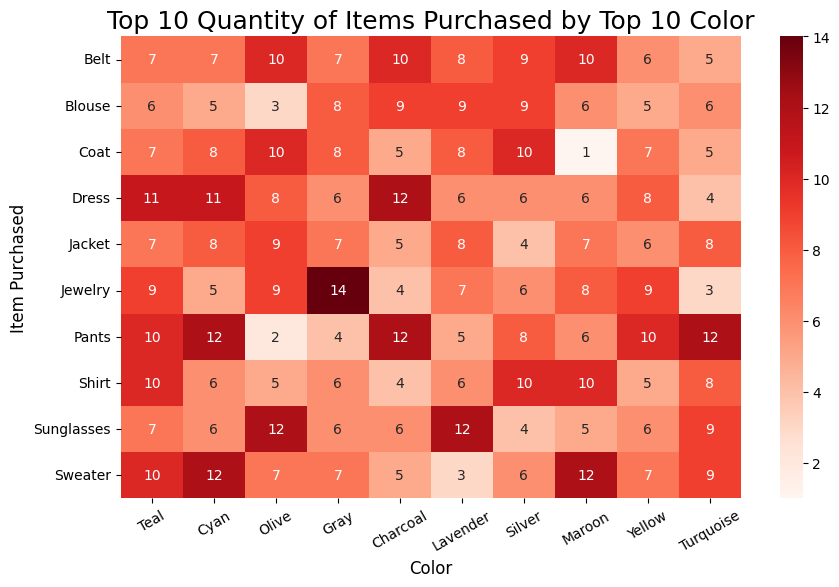

In [49]:
item_quantities = dataSail['Item Purchased'].value_counts().head(10).index
filtered_data = dataSail[dataSail['Item Purchased'].isin(item_quantities)]

ClothesColor = filtered_data.groupby(['Item Purchased', 'Color']).size().reset_index(name='Quantity')
ClothesColor = ClothesColor.pivot(index='Item Purchased', columns='Color', values='Quantity').fillna(0)

color_quantities = ClothesColor.sum(axis=0).sort_values(ascending=False).head(10).index
ClothesColor_top10 = ClothesColor[color_quantities]


plt.figure(figsize=(10, 6))
sns.heatmap(data=ClothesColor_top10, annot=True, fmt='d', cmap='Reds')
plt.title('Top 10 Quantity of Items Purchased by Top 10 Color', fontsize=18)
plt.xlabel('Color', fontsize=12)
plt.ylabel('Item Purchased', fontsize=12)
plt.xticks(rotation=30)
plt.show()

# **Finally, i´d like just to show the relationship between the the most item purchased and the ten most colors chosen.**